<a href="https://colab.research.google.com/github/ShashankDsa/Task-6/blob/main/Assignment5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

### Find the linear regression equation for this data.

In [ ]:
df = df.reindex(columns = ["Ground Temperature","Chirps/Second"])

In [ ]:
print(df.shape)
df.head()

(15, 2)


,Ground Temperature,Chirps/Second
0,88.6,20.0
1,71.6,16.0
2,93.3,19.8
3,84.3,18.4
4,80.6,17.1


In [ ]:
df.describe()

,Ground Temperature,Chirps/Second
count,15.000000,15.000000
mean,79.346667,16.566667
std,7.020467,1.712837
min,69.400000,14.400000
25%,73.400000,15.450000
50%,80.600000,16.000000
75%,83.400000,17.150000
max,93.300000,20.000000


In [ ]:
df.isnull().sum()

Ground Temperature    0
Chirps/Second         0
dtype: int64

In [ ]:
df.dtypes

Ground Temperature    float64
Chirps/Second         float64
dtype: object

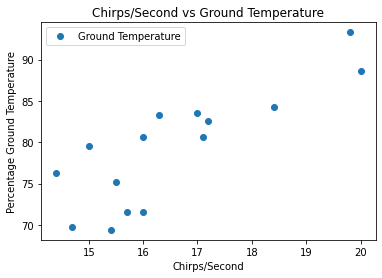

In [ ]:
df.plot(x='Chirps/Second', y='Ground Temperature', style='o')
plt.title('Chirps/Second vs Ground Temperature')
plt.xlabel('Chirps/Second')
plt.ylabel('Percentage Ground Temperature')
plt.show()

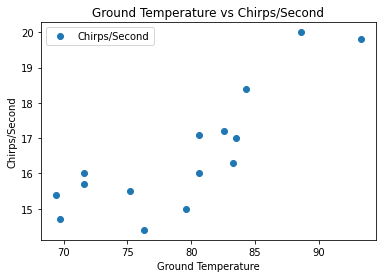

In [ ]:
df.plot(x='Ground Temperature', y='Chirps/Second', style='o')
plt.title('Ground Temperature vs Chirps/Second')
plt.xlabel('Ground Temperature')
plt.ylabel('Chirps/Second')
plt.show()

In [ ]:
df.corr()

,Ground Temperature,Chirps/Second
Ground Temperature,1.000000,0.832042
Chirps/Second,0.832042,1.000000


In [ ]:
X = df.iloc[:, :-1].values # select all rows and select all columns except the last column as my feature
y = df.iloc[:, 1].values # target as arrays
# Syntax : dataset.loc[:, :-1]
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
y_test

array([15.5, 15. , 18.4, 19.8, 17.1])

In [ ]:
X_train.shape, X_test.shape

((10, 1), (5, 1))

In [ ]:
X_test

array([[75.2],
       [79.6],
       [84.3],
       [93.3],
       [80.6]])

In [ ]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * temp + c  
"Syntax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c

LinearRegression()

In [ ]:
model = LinearRegression().fit(X_train, y_train)

### Chart the original data and the equation on the chart.

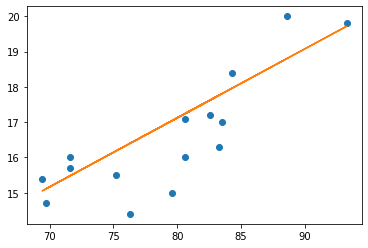

In [ ]:
plt.plot(X,y,"o")
plt.plot(X,model.predict(X))

In [ ]:
print(regressor.intercept_) # c

2.323010322071182


In [ ]:
print(regressor.coef_)

[0.17945175]


### Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

In [ ]:
regressor.predict([[95]])

array([19.37092617])

## The birds chirp 19.370 per second if the temprature is 95.

### Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

In [ ]:
regressor.predict([[83.73]])

array([17.84762984])

In [ ]:
from scipy.interpolate import interp1d

In [ ]:
interpolate_X = 18

In [ ]:
y=df["Ground Temperature"]
X=df["Chirps/Second"]

In [ ]:
y_interp = interp1d(X, y)

In [ ]:
print("Value of Y at x = {} is".format(interpolate_X),
      y_interp(interpolate_X))

Value of Y at x = 18 is 83.73333333333333


In [ ]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred

array([15.8177816 , 16.60736928, 17.45079249, 19.0658582 , 16.78682103])

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,15.5,15.817782
1,15.0,16.607369
2,18.4,17.450792
3,19.8,19.065858
4,17.1,16.786821


### Find the equation's R2 score

In [ ]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.7349572363259778


This model's R2 score is lesser than 0.8 and amounts to 0.734. 

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

### Find the linear regression equation for this data.

In [ ]:
df = pd.read_fwf("/content/sample_data/brain_body.txt")

In [ ]:
print(df.shape)
df.head()

(62, 2)


,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [ ]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [ ]:
df.loc[df['Brain'].le(4000) & df['Body'].le(4000)]

,Brain,Body
0,3.385,44.50
1,0.480,15.50
2,1.350,8.10
3,465.000,423.00
4,36.330,119.50
5,27.660,115.00
6,14.830,98.20
7,1.040,5.50
8,4.190,58.00
9,0.425,6.40


In [ ]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

In [ ]:
df.dtypes

Brain    float64
Body     float64
dtype: object

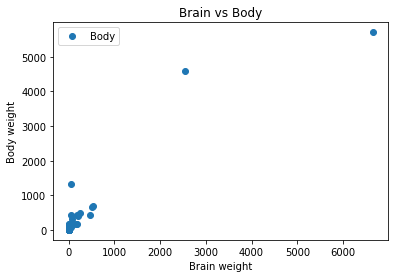

In [ ]:
df.plot(x='Brain', y='Body', style='o')
plt.title('Brain vs Body')
plt.xlabel('Brain weight')
plt.ylabel('Body weight')
plt.show()

In [ ]:
df.corr()

,Brain,Body
Brain,1.000000,0.934164
Body,0.934164,1.000000


In [ ]:
X = df.iloc[:, :-1].values # select all rows and select all columns except the last column as my feature
y = df.iloc[:, 1].values # target as arrays
# Syntax : dataset.loc[:, :-1]
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 7)

In [ ]:
y_test

array([1.080e+01, 8.100e+00, 5.600e+01, 6.800e+02, 1.320e+03, 6.550e+02,
       3.250e+02, 1.230e+01, 1.700e+01, 1.400e-01, 1.570e+02, 4.603e+03,
       6.300e+00, 4.190e+02, 2.100e+01, 3.000e+00, 4.000e+00, 4.900e+02,
       6.600e+00])

In [ ]:
X_train.shape, X_test.shape

((43, 1), (19, 1))

In [ ]:
X_test

array([[3.500e+00],
       [1.350e+00],
       [3.500e+01],
       [5.290e+02],
       [6.200e+01],
       [5.210e+02],
       [8.500e+01],
       [7.500e-01],
       [4.050e+00],
       [5.000e-03],
       [1.000e+02],
       [2.547e+03],
       [1.700e+00],
       [1.871e+02],
       [3.600e+00],
       [1.220e-01],
       [1.010e-01],
       [2.500e+02],
       [1.000e+00]])

In [ ]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * body + c  
"Syntax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c

LinearRegression()

In [ ]:
model = LinearRegression().fit(X_train, y_train)

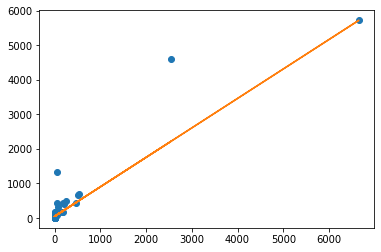

In [ ]:
plt.plot(X,y,"o")
plt.plot(X,model.predict(X))

In [ ]:
print(regressor.intercept_) # c

45.21711532031185


In [ ]:
print(regressor.coef_)

[0.85274603]


In [ ]:
regressor.predict([[36.330]])

array([76.19737857])

In [ ]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred

array([  48.20172642,   46.36832246,   75.06322635,  496.31976483,
         98.08736914,  489.49779659,  117.70052781,   45.85667484,
         48.67073674,   45.22137905,  130.49171825, 2217.16125198,
         46.66678357,  204.7658974 ,   48.28700103,   45.32115034,
         45.30324267,  258.40362265,   46.06986135])

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,10.80,48.201726
1,8.10,46.368322
2,56.00,75.063226
3,680.00,496.319765
4,1320.00,98.087369
5,655.00,489.497797
6,325.00,117.700528
7,12.30,45.856675
8,17.00,48.670737
9,0.14,45.221379


### Find the equation's R2 score

In [ ]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.6352705883696133


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [ ]:
df = pd.read_fwf("/content/sample_data/salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [ ]:
df

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516
6,1,3,0,0,32,24900
7,0,3,16,1,18,31909
8,0,3,13,0,30,31850
9,0,3,13,0,31,32850


In [ ]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [ ]:
df.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

In [ ]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [ ]:
df.shape

(52, 6)

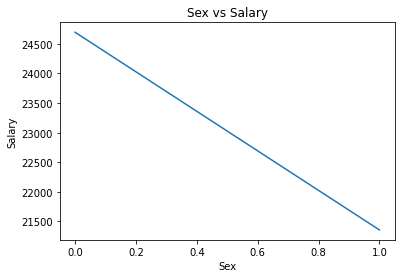

In [ ]:
df.groupby('Sex')['Salary'].mean().plot()
#dataset.plot(x='Sex', y='Salary', style='o')
plt.title('Sex vs Salary')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()

In [ ]:
df[['Sex','Salary']].corr()

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


There is a low linear relationship between sex and salary.

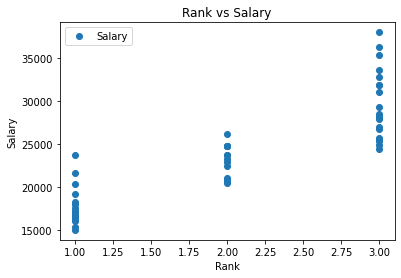

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


In [ ]:
df.plot(x='Rank', y='Salary', style='o')
plt.title('Rank vs Salary')
plt.xlabel('Rank')
plt.ylabel('Salary')
plt.show()
#dataset[['Average_income','Petrol_Consumption']].corr()
df[['Rank','Salary']].corr()

High correlation between rank and salary 

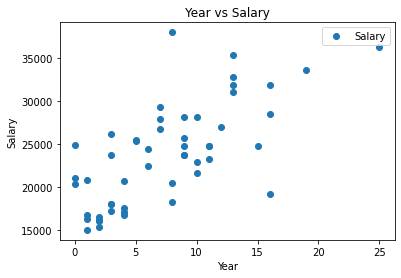

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


In [ ]:
df.plot(x='Year', y='Salary', style='o')
plt.title('Year vs Salary')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.show()
#dataset[['Average_income','Petrol_Consumption']].corr()
df[['Year','Salary']].corr()

Good correlation between Year and Salary 

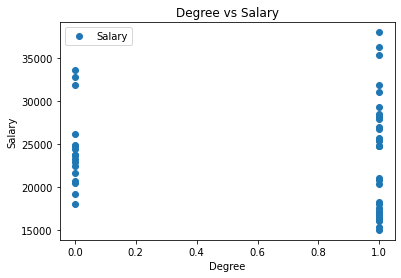

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


In [ ]:
df.plot(x='Degree', y='Salary', style='o')
plt.title('Degree vs Salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()
#dataset[['Average_income','Petrol_Consumption']].corr()
df[['Degree','Salary']].corr()

Good correlation between Degree and Salary

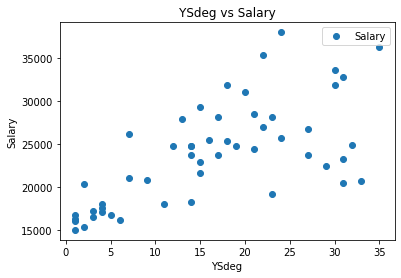

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


In [ ]:
df.plot(x='YSdeg', y='Salary', style='o')
plt.title('YSdeg vs Salary')
plt.xlabel('YSdeg')
plt.ylabel('Salary')
plt.show()
#dataset[['Average_income','Petrol_Consumption']].corr()
df[['YSdeg','Salary']].corr()

Good correlation between YSdeg and Salary

In [ ]:
X = df[['Rank','Year','Degree','YSdeg']].values #array of features
y = df['Salary'].values #array of targets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train,y_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,['Rank','Year',
      'Degree','YSdeg'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df

,Coefficient
Rank,4429.894143
Year,2119.046696
Degree,392.234727
YSdeg,-71.033679


In [ ]:
regressor.intercept_ 

23655.90243902439

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,26182,21229.832876
1,17095,17364.819796
2,24750,26604.005994
3,22450,22233.722944
4,28200,29767.574788
5,21600,18753.619100
6,18075,16980.428598
7,23713,18376.013517
8,24800,25100.369276
9,33696,32336.690145


In [ ]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.6185296411890914


In [ ]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train_scaled, y_train)
list(zip(['Rank', 'Year', 'Degree',
       'YSdeg'],selector.support_))

[('Rank', True), ('Year', True), ('Degree', True), ('YSdeg', False)]

In [ ]:
print('coefficient for each column:' , list(zip( regressor.coef_)) ,  sep='\n ')

coefficient for each column:
 [(4429.894142763725,), (2119.0466963637186,), (392.2347273889185,), (-71.03367888032608,)]


### Rank seems to have the highest coefficient with respect to salary
### The R2 score for this model is  0.61852